<a href="https://colab.research.google.com/github/Y-382/pedestrian-detection-YOLOv7/blob/main/Pedestrian_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pedestrian Detection using custom dataset
For this project an extract of INRIA images dataset is used to train the YOLOv7 model. The training dataset consists of 614 images and the test data consists of 288 images. YOLOv7-tiny architecture is used to train the model.

####Converting XML files to TXT files to be used with YOLO algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xml.etree.ElementTree as ET
import glob
import os
import json


def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]


def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]


classes = []
input_dir = "/content/drive/MyDrive/inria_person/PICTURES_LABELS_TRAIN/ANOTATION/"
output_dir = "/content/drive/MyDrive/inria_person/PICTURES_LABELS_TRAIN/annotations/"
image_dir = "/content/drive/MyDrive/inria_person/PICTURES_LABELS_TRAIN/PICTURES/"

# create the labels folder (output directory)
os.mkdir(output_dir)

# identify all the xml files in the annotations folder (input directory)
files = glob.glob(os.path.join(input_dir, '*.xml'))
# loop through each 
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    # check if the label contains the corresponding image file
    if not os.path.exists(os.path.join(image_dir, f"{filename}.jpg")):
        print(f"{filename} image does not exist!")
        continue

    result = []

    # parse the content of the xml file
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        label = obj.find("name").text
        # check for new classes and append to list
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        # convert data to string
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:
        # generate a YOLO format text file for each xml file
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))

# generate the classes file as reference
with open('classes.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(classes))

### Visualizing the images with their associated bounding boxes

In [ ]:
from PIL import Image, ImageDraw
# to convet yolo to xml boxes
def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]

In [ ]:
def draw_image(img, bboxes):
    draw = ImageDraw.Draw(img)
    for bbox in bboxes:
        draw.rectangle(bbox, outline="red", width=2)
    img.save("example.jpg")

In [ ]:
image_filename = "/content/drive/MyDrive/inria_person/PICTURES_LABELS_TEST/PICTURES/crop001501.jpg"
label_filename = "/content/drive/MyDrive/inria_person/PICTURES_LABELS_TEST/annotations/crop001501.txt"
bboxes = []

In [ ]:
# Visualizing with the boxes
img = Image.open(image_filename)

with open(label_filename, 'r', encoding='utf8') as f:
    for line in f:
        data = line.strip().split(' ')
        bbox = [float(x) for x in data[1:]]
        bboxes.append(yolo_to_xml_bbox(bbox, img.width, img.height))

draw_image(img, bboxes)

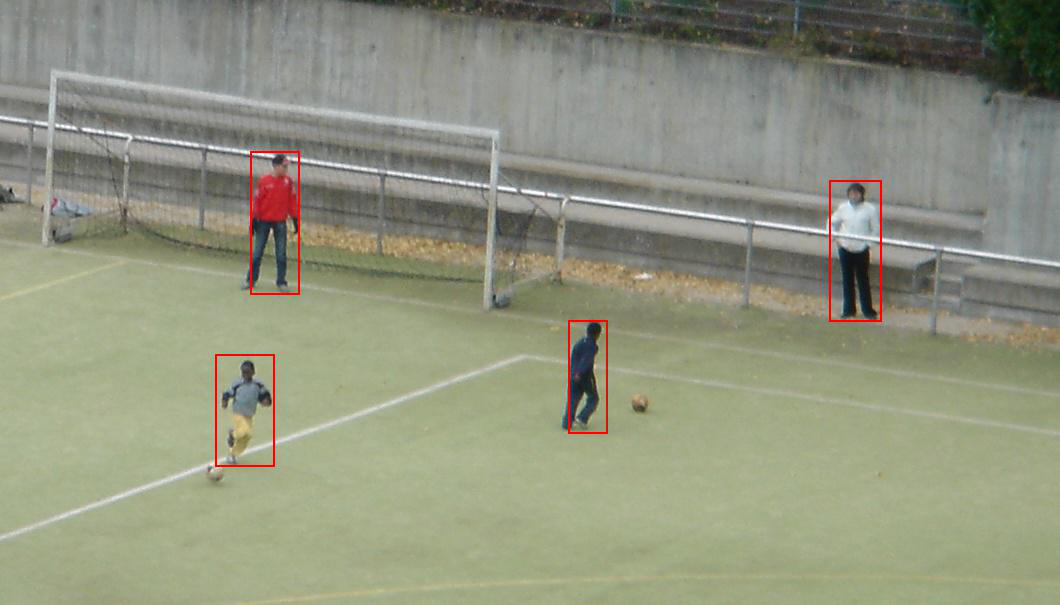

In [ ]:
Image.open("example.jpg")

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


###Installing Python CUDA

In [ ]:
!pip install pycuda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 36.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 70 kB 10.5 MB/s 
     |████████████████████████████████| 78 kB 9.3 MB/s 
  Created wheel for pycuda: filename=pycuda-2022.1-cp37-cp37m-linux_x86_64.whl size=629701 sha256=da3405499bb65a9094a6dba925ac18a72b4e4e6c7d0f3d00b40ec00826c1f05e
  Stored in directory: /root/.cache/pip/wheels/17/53/c9/caa05618e686df51f017d8a9923f38d915ce31df67ab6628e6
  Created wheel for pytools: filename=pytools-2022.1.12-py2.py3-none-any.whl size=65033 sha256=570c3b18935e2ba64608fa9c825a8c078e76f80140538d3b411a6c0d312ecc63
  Stored in directory: /root/.cache/pip/wheels/37/5e/9e/76d7430e116b7cab0016fbabb26b896daae1946a3f7dea9915
Successfully built pycuda pytools


In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [ ]:
torch.version.cuda

'11.3'

In [ ]:
cd /content/drive/MyDrive/inria_person/

/content/drive/MyDrive/inria_person


In [ ]:
pwd

'/content/drive/MyDrive/inria_person'

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 998, done.
remote: Total 998 (delta 0), reused 0 (delta 0), pack-reused 998
Receiving objects: 100% (998/998), 69.77 MiB | 16.85 MiB/s, done.
Resolving deltas: 100% (467/467), done.
Checking out files: 100% (104/104), done.


In [ ]:
cd /content/drive/MyDrive/inria_person/yolov7

/content/drive/MyDrive/inria_person/yolov7


In [ ]:
import os
import shutil
file = os.listdir("/content/drive/MyDrive/inria_person/PICTURES_LABELS_TRAIN/annotations")
for i in file:
  shutil.move("/content/drive/MyDrive/inria_person/PICTURES_LABELS_TRAIN/annotations/"+i, "/content/drive/MyDrive/inria_person/PICTURES_LABELS_TRAIN/PICTURES")

In [ ]:
file1 = os.listdir("/content/drive/MyDrive/inria_person/PICTURES_LABELS_TRAIN/PICTURES")
len(file1)

1229

In [ ]:
!python train.py --workers 1 --device 0 --batch-size 8 --epochs 60 --img 640 640 --data data/custom_data.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7-tiny_custom.yaml --name yolov7_custom --weights yolov7-tiny.pt

YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7-tiny_custom.yaml', data='data/custom_data.yaml', device='0', entity=None, epochs=60, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7_custom', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7_custom', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='yolov7-tiny.pt', workers=1, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_

In [ ]:
!python detect.py --weights yolov7_custom_best.pt --conf 0.5 --img-size 640 --source /content/urban-people-crowd-citizens-preview.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/urban-people-crowd-citizens-preview.jpg', update=False, view_img=False, weights=['yolov7_custom_best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
9 persons, Done. (7.1ms) Inference, (1.3ms) NMS
 The image with the result is saved

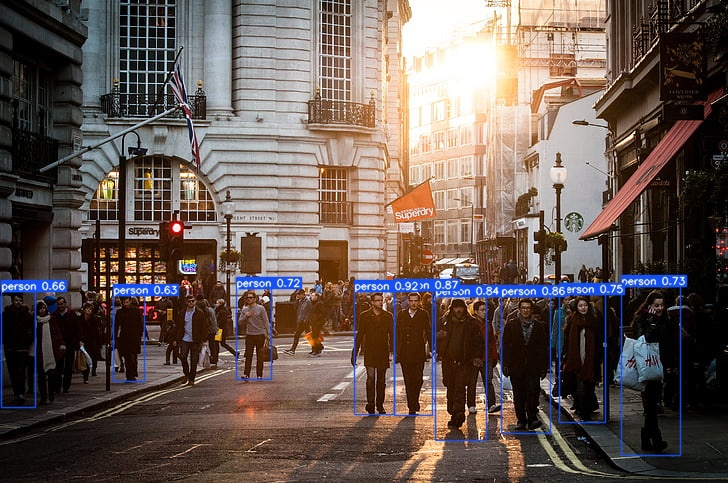

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/MyDrive/inria_person/yolov7/runs/detect/exp5/urban-people-crowd-citizens-preview.jpg")
cv2_imshow(img)

In [ ]:
!python test.py --weights yolov7_custom_best.pt --data data/custom_data.yaml

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/custom_data.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['yolov7_custom_best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
val: Scanning '/content/drive/MyDrive/inria_person/PICTURES_LABELS_TEST/PICTU

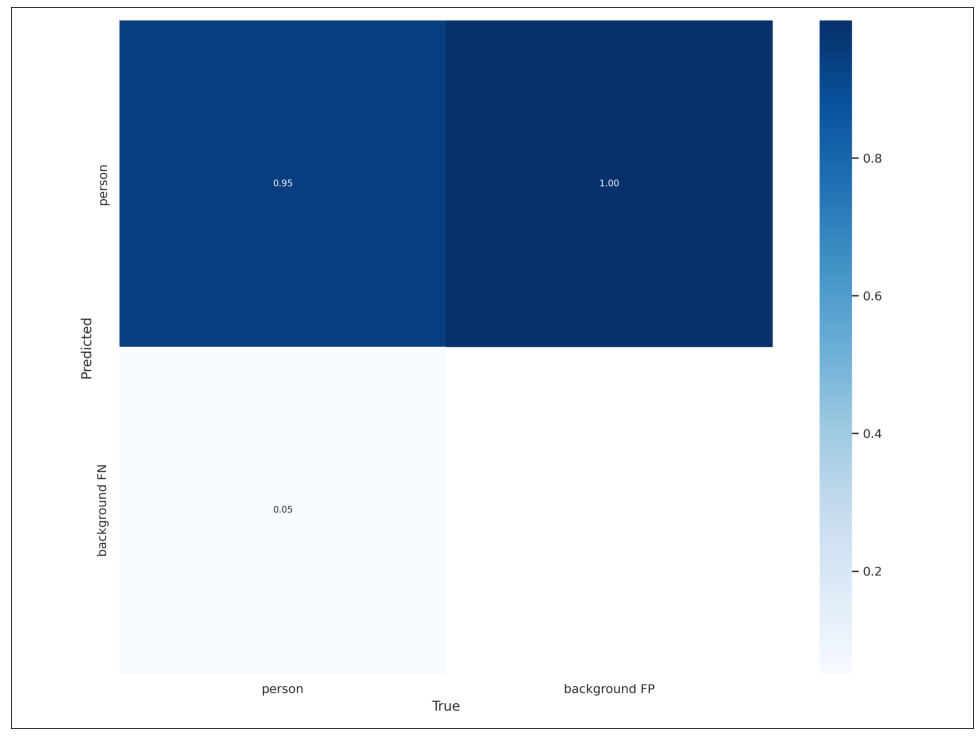

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('/content/drive/MyDrive/inria_person/yolov7/runs/test/exp2/confusion_matrix.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(100, 100))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

In [ ]:
!python train.py --workers 1 --device 0 --batch-size 8 --epochs 40 --img 640 640 --data data/custom_data.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7-tiny_custom.yaml --name yolov7_custom --weights yolov7_custom2.pt

YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7-tiny_custom.yaml', data='data/custom_data.yaml', device='0', entity=None, epochs=40, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7_custom', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7_custom7', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='yolov7_custom2.pt', workers=1, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, war

In [ ]:
!python test.py --weights yolov7_custom3.pt --data data/custom_data.yaml

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/custom_data.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['yolov7_custom3.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
val: Scanning '/content/drive/MyDrive/inria_person/PICTURES_LABELS_TEST/PICTURES.

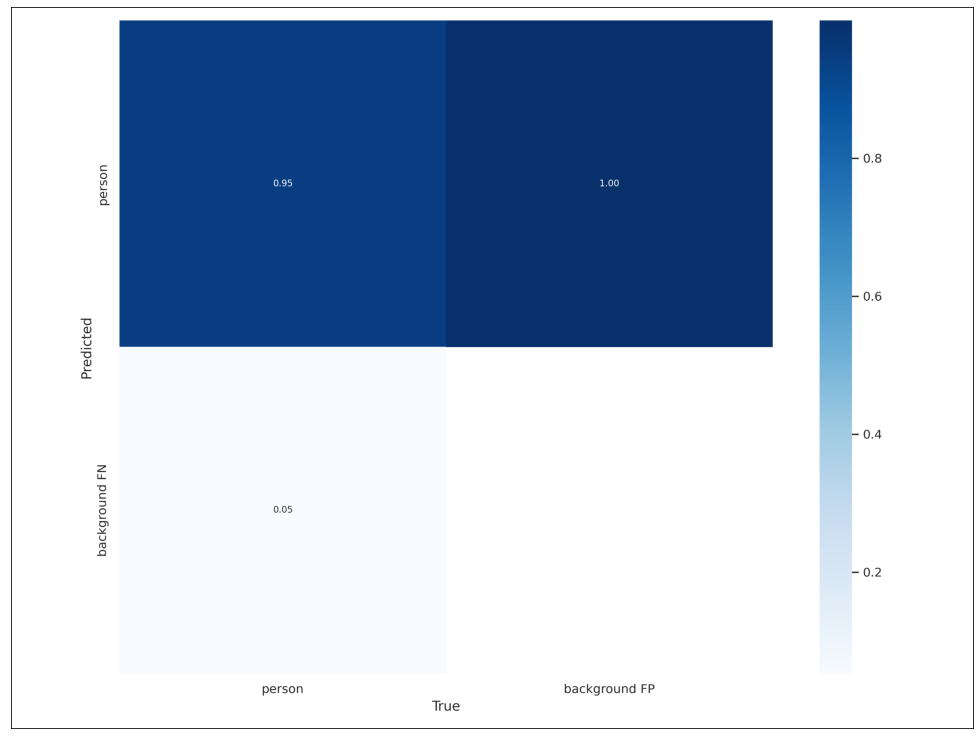

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('/content/drive/MyDrive/inria_person/yolov7/runs/test/exp4/confusion_matrix.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(100, 100))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

In [ ]:
!python detect.py --weights yolov7_custom3.pt --conf 0.5 --img-size 640 --source /content/urban-people-crowd-citizens-preview.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/urban-people-crowd-citizens-preview.jpg', update=False, view_img=False, weights=['yolov7_custom3.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
10 persons, Done. (6.8ms) Inference, (1.2ms) NMS
 The image with the result is saved in

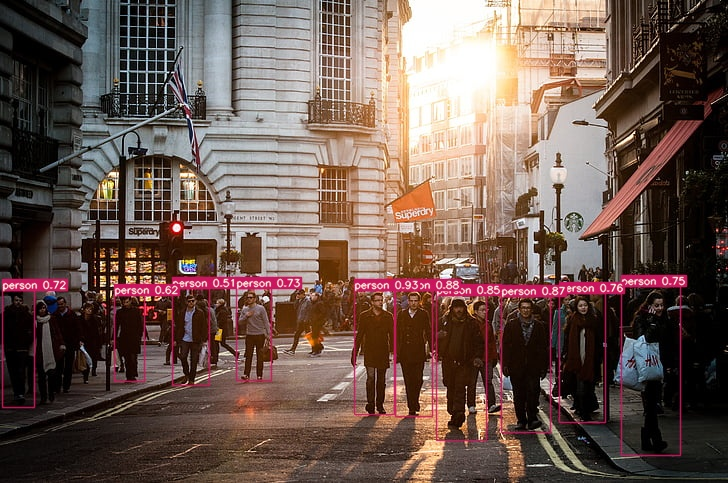

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/MyDrive/inria_person/yolov7/runs/detect/exp8/urban-people-crowd-citizens-preview.jpg")
cv2_imshow(img)

In [ ]:
cd /content/drive/MyDrive/inria_person/yolov7

/content/drive/MyDrive/inria_person/yolov7


In [ ]:
!python detect.py --weights yolov7_custom3.pt --conf 0.5 --source "/content/drive/MyDrive/inria_person/PICTURES_LABELS_TEST/PICTURES/crop001511.jpg"

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/inria_person/PICTURES_LABELS_TEST/PICTURES/crop001511.jpg', update=False, view_img=False, weights=['yolov7_custom3.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 person, Done. (10.4ms) Inference, (6.0ms) NMS
 The im

In [ ]:
cd ..

/content/drive/MyDrive/inria_person


In [ ]:
!git clone --recurse-submodules https://github.com/mikel-brostrom/Yolov7_StrongSORT_OSNet.git

Cloning into 'Yolov7_StrongSORT_OSNet'...
remote: Enumerating objects: 1655, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 1655 (delta 46), reused 84 (delta 42), pack-reused 1562
Receiving objects: 100% (1655/1655), 36.04 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (834/834), done.
Submodule 'strong_sort/deep/reid' (https://github.com/KaiyangZhou/deep-person-reid) registered for path 'strong_sort/deep/reid'
Submodule 'yolov7' (https://github.com/mikel-brostrom/yolov7) registered for path 'yolov7'
Cloning into '/content/drive/MyDrive/inria_person/Yolov7_StrongSORT_OSNet/strong_sort/deep/reid'...
remote: Enumerating objects: 9860, done.        
remote: Counting objects: 100% (10/10), done.        
remote: Compressing objects: 100% (9/9), done.        
remote: Total 9860 (delta 1), reused 10 (delta 1), pack-reused 9850
Receiving objects: 100% (9860/9860), 9.57 MiB | 8.31 MiB/s, done.
Resolving deltas: 100% (7286/7286

In [ ]:
cd /content/drive/MyDrive/inria_person/Yolov7_StrongSORT_OSNet

/content/drive/MyDrive/inria_person/Yolov7_StrongSORT_OSNet


In [ ]:
!python track.py --source "/content/drive/MyDrive/inria_person/Pedestrian Walking ,Human Activity Recognition Video ,DataSet By UET Peshawar.mp4" --yolo-weights /content/drive/MyDrive/inria_person/Yolov7_StrongSORT_OSNet/weights/yolov7-tiny.pt --classes 0 --save-vid

Streaming output truncated to the last 5000 lines.
video 1/1 (5686/14743) /content/drive/MyDrive/inria_person/Pedestrian Walking ,Human Activity Recognition Video ,DataSet By UET Peshawar.mp4: 384x640 4 persons, Done. YOLO:(0.013s), StrongSORT:(0.076s)
video 1/1 (5687/14743) /content/drive/MyDrive/inria_person/Pedestrian Walking ,Human Activity Recognition Video ,DataSet By UET Peshawar.mp4: 384x640 4 persons, Done. YOLO:(0.012s), StrongSORT:(0.071s)
video 1/1 (5688/14743) /content/drive/MyDrive/inria_person/Pedestrian Walking ,Human Activity Recognition Video ,DataSet By UET Peshawar.mp4: 384x640 3 persons, Done. YOLO:(0.011s), StrongSORT:(0.056s)
video 1/1 (5689/14743) /content/drive/MyDrive/inria_person/Pedestrian Walking ,Human Activity Recognition Video ,DataSet By UET Peshawar.mp4: 384x640 4 persons, Done. YOLO:(0.011s), StrongSORT:(0.080s)
video 1/1 (5690/14743) /content/drive/MyDrive/inria_person/Pedestrian Walking ,Human Activity Recognition Video ,DataSet By UET Peshawar.mp4: